### 라이브러리 설치 및 로드

In [ ]:
!pip install pysal

In [ ]:
!pip install contextily

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.lib import weights
import geopandas as gpd


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### 영등포구 총 인구 수 SHP 파일 로드

http://map.ngii.go.kr/ms/map/NlipMap.do?tabGb=statsMap

국토정보맵, 서울특별시 영등포구 총 인구 수 100M 격자, 20년 10월 기준 사용

In [4]:
db = gpd.read_file('/QGIS/Population/nlsp_021001001.shp',encoding='utf-8')

In [5]:
db['val'] = db['val'].fillna(0)

db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       2605 non-null   object  
 1   lbl       1241 non-null   object  
 2   val       2605 non-null   float64 
 3   geometry  2605 non-null   geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 81.5+ KB


In [6]:
db.crs # 좌표계

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

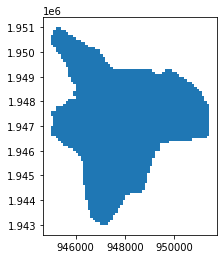

In [7]:
db.plot()

Queen contiguity를 통해 Weights 계산

In [8]:
w = weights.Queen.from_dataframe(db)
w.transform = 'R' 

In [9]:
Wmatrix, ids = w.full()

### 가중합 계산

가중합 = 기준 격자 값 + 인접한 8개 격자의 평균값 계산

In [10]:
val_list = []
for i in range(len(db)):
  val_list.append(sum(pd.Series(Wmatrix[i]) * db['val']) + db['val'][i])

In [11]:
db['result'] = val_list

In [12]:
db

,gid,lbl,val,geometry,result
0,다사469469,383.00,383.0,"POLYGON ((946900.000 1946900.000, 946900.000 1...",515.375
1,다사466473,42.00,42.0,"POLYGON ((946600.000 1947300.000, 946600.000 1...",472.875
2,다사471472,28.00,28.0,"POLYGON ((947100.000 1947200.000, 947100.000 1...",371.375
3,다사479468,21.00,21.0,"POLYGON ((947900.000 1946800.000, 947900.000 1...",213.000
4,다사478439,60.00,60.0,"POLYGON ((947800.000 1943900.000, 947800.000 1...",181.500
...,...,...,...,...,...
2600,다사506468,None,0.0,"POLYGON ((950600.000 1946800.000, 950600.000 1...",0.000
2601,다사473458,None,0.0,"POLYGON ((947300.000 1945800.000, 947300.000 1...",509.250
2602,다사493475,None,0.0,"POLYGON ((949300.000 1947500.000, 949300.000 1...",0.000
2603,다사501474,None,0.0,"POLYGON ((950100.000 1947400.000, 950100.000 1...",0.000


In [13]:
db.to_csv('/QGIS/Demand/영등포구_인구가중합.csv',encoding='cp949',index=False)